# Analiza podataka o kvalitetu vazduha u Banjoj Luci sa PurpleAir senzora

Ucitaj podatke sa [google drive foldera](https://drive.google.com/drive/folders/1aRPfZljG-VQxIDaGXaYfO3IlUbsqxvtN?usp=sharing)
- skini 4 fajla na svoj racunar i kopiraj u folder `sveske`

In [1]:
import numpy as np
import pandas as pd
from matplotlib.pylab import plt

In [2]:
borik = pd.read_csv('_Banja Luka - Borik (44.772053299999996 17.2045055) Primary 12_01_2018 08_10_2019 sa Lokacijom.csv')
centar = pd.read_csv('_Banja Luka - Centar (44.773626199999995 17.189454299999998) Primary 12_01_2018 08_10_2019 sa Lokacijom.csv')
sime_matavulja = pd.read_csv('_Banja Luka - Sime Matavulja Primary 12_01_2018 08_10_2019 sa Lokacijom.csv')

In [3]:
centar.head()

,created_at,Lokacija,entry_id,PM1.0_CF_ATM_ug/m3,PM2.5_CF_ATM_ug/m3,PM10.0_CF_ATM_ug/m3,UptimeMinutes,RSSI_dbm,Pressure_hpa,Temperatura,PM2.5_CF_1_ug/m3
0,2019-03-15 16:42:21 UTC,Centar,1,28.75,46.70,48.59,6,-72,71.0,23.0,40.02
1,2019-03-15 16:47:51 UTC,Centar,2,43.18,67.98,72.18,11,-76,69.0,23.0,49.18
2,2019-03-15 16:48:57 UTC,Centar,3,44.07,68.62,72.19,12,-72,68.0,23.0,49.14
3,2019-03-15 16:50:17 UTC,Centar,4,45.66,68.51,73.47,14,-74,69.0,23.0,49.30
4,2019-03-15 16:51:37 UTC,Centar,5,46.36,69.78,73.36,15,-76,68.0,23.0,49.89


In [4]:
borik.head()

,created_at,Lokacija,entry_id,PM1.0_CF_ATM_ug/m3,PM2.5_CF_ATM_ug/m3,PM10.0_CF_ATM_ug/m3,UptimeMinutes,RSSI_dbm,Pressure_hpa,Temperatura,PM2.5_CF_1_ug/m3
0,2019-02-19 18:26:47 UTC,Borik,1,102.19,157.50,172.69,1169,-78,57,33,104.04
1,2019-02-19 18:28:07 UTC,Borik,2,101.57,156.43,169.11,1170,-80,57,33,103.39
2,2019-02-19 18:29:27 UTC,Borik,3,105.42,160.14,172.65,1171,-79,57,33,105.98
3,2019-02-19 18:30:46 UTC,Borik,4,110.39,169.82,185.39,1173,-78,56,33,112.25
4,2019-02-19 18:32:07 UTC,Borik,5,101.22,157.24,169.62,1174,-76,57,34,103.87


In [5]:
# spoji u jedan veliki pandas dataframe

In [6]:
centar.loc[0,'created_at']

'2019-03-15 16:42:21 UTC'

In [8]:
# spojimo podatke u jedan veliki dataframe
podaci = centar.append(borik).append(sime_matavulja)

In [9]:
# koje lokacije imamo dataframe-u
podaci['Lokacija'].unique()

array(['Centar', 'Borik', 'Sime Matavulja'], dtype=object)

In [10]:
podaci = podaci.sort_values('created_at', ascending = True)

In [11]:
podaci.head()

,created_at,Lokacija,entry_id,PM1.0_CF_ATM_ug/m3,PM2.5_CF_ATM_ug/m3,PM10.0_CF_ATM_ug/m3,UptimeMinutes,RSSI_dbm,Pressure_hpa,Temperatura,PM2.5_CF_1_ug/m3
0,2019-01-11 18:14:37 UTC,Sime Matavulja,1,224.72,416.26,499.17,1426,-62,39.0,50.0,276.50
1,2019-01-11 18:15:58 UTC,Sime Matavulja,2,232.11,426.39,515.15,1427,-66,39.0,50.0,283.13
2,2019-01-11 18:17:17 UTC,Sime Matavulja,3,233.95,441.36,531.57,1428,-64,38.0,50.0,293.16
3,2019-01-11 18:18:37 UTC,Sime Matavulja,4,241.71,445.53,526.76,1430,-63,38.0,50.0,295.89
4,2019-01-11 18:19:57 UTC,Sime Matavulja,5,247.28,455.46,533.22,1431,-61,38.0,50.0,302.43


In [61]:
# koliko ocitavanja imamo po lokaciji
podaci.groupby('Lokacija').count()

,created_at,entry_id,PM1.0_CF_ATM_ug/m3,PM2.5_CF_ATM_ug/m3,PM10.0_CF_ATM_ug/m3,UptimeMinutes,RSSI_dbm,Pressure_hpa,Temperatura,PM2.5_CF_1_ug/m3,Godina,Mjesec,Dan,Sat,timestamp
Lokacija,,,,,,,,,,,,,,,
Borik,14665,14665,14665,14665,14665,14665,14665,14665,14665,14665,14665,14665,14665,14665,14665
Centar,103747,103747,103747,103747,103747,103747,103747,103696,103696,103747,103747,103747,103747,103747,103747
Sime Matavulja,21987,21987,21987,21987,21987,21987,21987,21987,21987,21987,21987,21987,21987,21987,21987


In [62]:
# Srednje vrijednosti snimljene na svakoj lokaciji
podaci.groupby('Lokacija').mean()

,entry_id,PM1.0_CF_ATM_ug/m3,PM2.5_CF_ATM_ug/m3,PM10.0_CF_ATM_ug/m3,UptimeMinutes,RSSI_dbm,Pressure_hpa,Temperatura,PM2.5_CF_1_ug/m3,Godina,Mjesec,Dan,Sat
Lokacija,,,,,,,,,,,,,
Borik,7333.0,56.685943,92.154215,101.868302,1399.352881,-68.637845,51.423594,39.481827,64.601995,2019.0,2.409887,15.740607,11.556154
Centar,51874.0,25.186757,38.729511,41.510320,3466.121160,-74.610957,41484.612367,46.233220,31.572302,2019.0,4.642563,15.762229,11.560874
Sime Matavulja,10994.0,99.454207,186.335910,217.314780,1638.942693,-65.562742,43.348752,51.277937,126.082780,2019.0,1.035476,20.804885,11.495065


In [63]:
# Dodaj kolone za mjesec, dan u sedmici i sat u danu
from datetime import datetime

podaci['timestamp'] = podaci['created_at'].apply(lambda x: datetime.strptime(x[:-4], '%Y-%m-%d %H:%M:%S'))
podaci.index = podaci['timestamp']
podaci_lt = podaci.tz_localize('UTC')

podaci = podaci_lt.tz_convert('Europe/Sarajevo')

# vise nam ne treba timestamp kolona
podaci.drop(labels = 'timestamp', axis = 1, inplace = True)

podaci.head()


,created_at,Lokacija,entry_id,PM1.0_CF_ATM_ug/m3,PM2.5_CF_ATM_ug/m3,PM10.0_CF_ATM_ug/m3,UptimeMinutes,RSSI_dbm,Pressure_hpa,Temperatura,PM2.5_CF_1_ug/m3,Godina,Mjesec,Dan,Sat
timestamp,,,,,,,,,,,,,,,
2019-01-11 19:14:37+01:00,2019-01-11 18:14:37 UTC,Sime Matavulja,1,224.72,416.26,499.17,1426,-62,39.0,50.0,276.50,2019,1,11,19
2019-01-11 19:15:58+01:00,2019-01-11 18:15:58 UTC,Sime Matavulja,2,232.11,426.39,515.15,1427,-66,39.0,50.0,283.13,2019,1,11,19
2019-01-11 19:17:17+01:00,2019-01-11 18:17:17 UTC,Sime Matavulja,3,233.95,441.36,531.57,1428,-64,38.0,50.0,293.16,2019,1,11,19
2019-01-11 19:18:37+01:00,2019-01-11 18:18:37 UTC,Sime Matavulja,4,241.71,445.53,526.76,1430,-63,38.0,50.0,295.89,2019,1,11,19
2019-01-11 19:19:57+01:00,2019-01-11 18:19:57 UTC,Sime Matavulja,5,247.28,455.46,533.22,1431,-61,38.0,50.0,302.43,2019,1,11,19


In [65]:
podaci["Godina"] = podaci.index.year
podaci["Mjesec"] = podaci.index.month
podaci["Dan"] = podaci.index.day
podaci["Sat"] = podaci.index.hour

podaci['timestamp'] = podaci.index

podaci.head()

,created_at,Lokacija,entry_id,PM1.0_CF_ATM_ug/m3,PM2.5_CF_ATM_ug/m3,PM10.0_CF_ATM_ug/m3,UptimeMinutes,RSSI_dbm,Pressure_hpa,Temperatura,PM2.5_CF_1_ug/m3,Godina,Mjesec,Dan,Sat,timestamp
timestamp,,,,,,,,,,,,,,,,
2019-01-11 19:14:37+01:00,2019-01-11 18:14:37 UTC,Sime Matavulja,1,224.72,416.26,499.17,1426,-62,39.0,50.0,276.50,2019,1,11,19,2019-01-11 19:14:37+01:00
2019-01-11 19:15:58+01:00,2019-01-11 18:15:58 UTC,Sime Matavulja,2,232.11,426.39,515.15,1427,-66,39.0,50.0,283.13,2019,1,11,19,2019-01-11 19:15:58+01:00
2019-01-11 19:17:17+01:00,2019-01-11 18:17:17 UTC,Sime Matavulja,3,233.95,441.36,531.57,1428,-64,38.0,50.0,293.16,2019,1,11,19,2019-01-11 19:17:17+01:00
2019-01-11 19:18:37+01:00,2019-01-11 18:18:37 UTC,Sime Matavulja,4,241.71,445.53,526.76,1430,-63,38.0,50.0,295.89,2019,1,11,19,2019-01-11 19:18:37+01:00
2019-01-11 19:19:57+01:00,2019-01-11 18:19:57 UTC,Sime Matavulja,5,247.28,455.46,533.22,1431,-61,38.0,50.0,302.43,2019,1,11,19,2019-01-11 19:19:57+01:00


In [67]:
# Pocetak i kraj mjerenja na lokacijama
print("Pocetak\n")
print(podaci.groupby('Lokacija').min()['timestamp'])
print("\nKraj\n")
print(podaci.groupby('Lokacija').max()['timestamp'])

Pocetak

Lokacija
Borik            2019-02-19 19:26:47+01:00
Centar           2019-03-15 17:42:21+01:00
Sime Matavulja   2019-01-11 19:14:37+01:00
Name: timestamp, dtype: datetime64[ns, Europe/Sarajevo]

Kraj

Lokacija
Borik            2019-03-06 17:43:55+01:00
Centar           2019-07-12 19:07:53+02:00
Sime Matavulja   2019-02-01 17:19:39+01:00
Name: timestamp, dtype: datetime64[ns, Europe/Sarajevo]


In [70]:
podaci.groupby(['Lokacija','Mjesec']).mean()

entry_id  PM1.0_CF_ATM_ug/m3  PM2.5_CF_ATM_ug/m3  \
Lokacija       Mjesec                                                     
Borik          2         4327.5           65.839177          108.751925   
               3        11660.0           43.508089           68.258594   
Centar         3         8674.5           44.785825           71.664015   
               4        33127.5           30.506235           48.274653   
               5        65325.5           15.450567           22.789381   
               6        89162.0           17.170051           23.538197   
               7       100163.5           15.528290           21.462739   
Sime Matavulja 1        10604.0           98.092600          183.358844   
               2        21597.5          136.474205          267.277769   

                       PM10.0_CF_ATM_ug/m3  UptimeMinutes   RSSI_dbm  \
Lokacija       Mjesec                                                  
Borik          2                121.219352     927.261498 -69.051075   
               3                 74.008714    2079.019963 -68.042921   
Centar         3                 77.878159     637.402352 -77.028649   
               4                 51.912020    1922.444230 -72.468439   
               5                 24.085973    1834.110512 -73.460655   
               6                 24.640006   11877.059993 -77.781463   
               7                 22.437458    7177.569057 -76.900391   
Sime Matavulja 1                213.433023    1681.600556 -65.584288   
               2                322.853782     479.141026 -64.976923   

                       Pressure_hpa  Temperatura  PM2.5_CF_1_ug/m3  Godina  \
Lokacija       Mjesec                                                        
Borik          2          46.867691    38.705801         75.017354  2019.0   
               3          57.982698    40.599068         49.607067  2019.0   
Centar         3          56.494016    39.406198         53.262516  2019.0   
               4       68110.990430    44.419513         37.799086  2019.0   
               5       65460.140508    51.064651         20.681037  2019.0   
               6          81.675025    47.072531         22.577121  2019.0   
               7          79.911830    46.821708         20.175008  2019.0   
Sime Matavulja 1          43.225633    51.156411        124.144714  2019.0   
               2          46.696154    54.582051        178.775808  2019.0   

                             Dan        Sat  
Lokacija       Mjesec                        
Borik          2       24.315346  11.900162  
               3        3.395608  11.060888  
Centar         3       23.390477  11.727750  
               4       15.390392  11.581025  
               5       16.161672  11.548115  
               6       10.827705  11.390967  
               7        7.320033  11.478376  
Sime Matavulja 1       21.533314  11.617249  
               2        1.000000   8.173077

In [75]:
podaci.describe()

,entry_id,PM1.0_CF_ATM_ug/m3,PM2.5_CF_ATM_ug/m3,PM10.0_CF_ATM_ug/m3,UptimeMinutes,RSSI_dbm,Pressure_hpa,Temperatura,PM2.5_CF_1_ug/m3,Godina,Mjesec,Dan,Sat
count,140399.000000,140399.000000,140399.000000,140399.000000,140399.000000,140399.000000,1.403480e+05,140348.000000,140399.000000,140399.0,140399.000000,140399.000000,140399.000000
mean,40819.631201,40.107476,67.425550,75.346476,2964.099566,-72.570068,3.066303e+04,46.318074,49.823018,2019.0,3.844472,16.549669,11.550075
std,31901.761830,51.249378,97.480083,115.143565,4537.040831,6.310946,8.106627e+06,12.043506,63.007414,0.0,1.698956,8.817878,6.930655
min,1.000000,0.040000,0.020000,0.020000,0.000000,-91.000000,2.600000e+01,14.000000,0.020000,2019.0,1.000000,1.000000,0.000000
25%,11700.500000,11.520000,16.070000,17.170000,508.000000,-76.000000,5.000000e+01,37.000000,16.070000,2019.0,3.000000,9.000000,6.000000
50%,33548.000000,21.210000,31.170000,32.960000,1325.000000,-73.000000,6.000000e+01,48.000000,30.620000,2019.0,4.000000,17.000000,12.000000
75%,68647.500000,47.090000,78.150000,84.680000,3244.000000,-69.000000,7.000000e+01,57.000000,56.440000,2019.0,5.000000,24.000000,18.000000
max,103747.000000,500.500000,1342.440000,1687.340000,26286.000000,31.000000,2.147484e+09,255.000000,893.880000,2019.0,7.000000,31.000000,23.000000


In [ ]:
# konvertuj temperaturu u stepen celzijus iz farenhajta

# Zadatak

Podijelite se u grupe. Svaka grupa treba:
- uraditi jedan od zadataka navedenih ispod
- da u [ovoj prezentaciji rezultata](https://docs.google.com/presentation/d/1pLEnAWdtdYRWu7Z8qMU-pJ5voHOKvffWKjasl8Uk-oA/edit?usp=sharing)
    - objasni sta je uradjeno
    - zalijepi plot rezultata
    - volonter treba da prezentuje rezultat

In [ ]:
1. Za lokaciju Centar napravi boxplot koji na horizontalnoj osi ima mjesec

In [ ]:
2. 

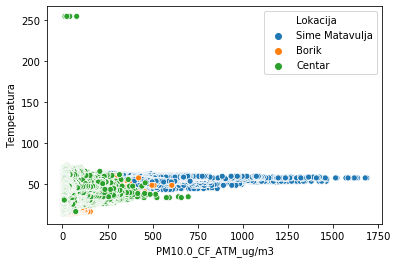

In [74]:
import seaborn as sea

sea.scatterplot(x='PM10.0_CF_ATM_ug/m3', y='Temperatura', hue = 'Lokacija', data=podaci)
plt.show()